<a href="https://colab.research.google.com/github/Prahlad77044/ml_beginner/blob/main/cnn_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0

In [ ]:
print('training input shape:'+str(x_train.shape))
print('training output shape:'+str(y_train.shape))
print('testing input shape:'+str(x_test.shape))
print('testing output shape:'+str(y_test.shape))

training input shape:(60000, 28, 28)
training output shape:(60000,)
testing input shape:(10000, 28, 28)
testing output shape:(10000,)


5


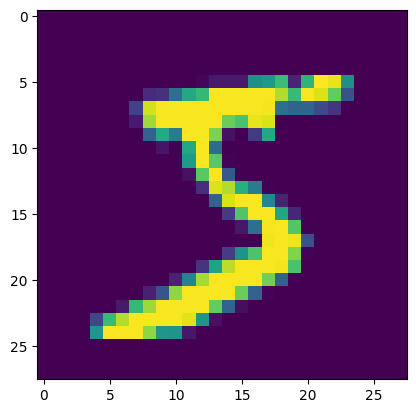

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
plt.show()

In [ ]:
import tensorflow.keras.layers as tfl
model=tf.keras.models.Sequential([
    tfl.ZeroPadding2D(padding=(3,3),input_shape=(28,28,1)),
    tfl.Conv2D(filters=32,kernel_size=(7,7),padding='same',activation='relu'),
    tfl.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tfl.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tfl.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tfl.Flatten(),
    tfl.Dense(units=128,activation='relu'),
    tfl.Dense(units=10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 34, 34, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 34, 34, 32)          │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,802 (2.08 MB)

 Trainable params: 545,802 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 172s 92ms/step - accuracy: 0.9900 - loss: 0.0323
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 93ms/step - accuracy: 0.9933 - loss: 0.0204
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 92ms/step - accuracy: 0.9955 - loss: 0.0147
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 92ms/step - accuracy: 0.9965 - loss: 0.0123
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 171s 91ms/step - accuracy: 0.9970 - loss: 0.0093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 172s 92ms/step - accuracy: 0.9967 - loss: 0.0103
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 92ms/step - accuracy: 0.9977 - loss: 0.0073
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 204s 93ms/step - accuracy: 0.9972 - loss: 0.0081
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 91ms/step - accuracy: 0.9986 - loss: 0.0052
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 92ms/step - accuracy: 0.9982 - loss: 0.0053


In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.9894 - loss: 0.0532


[0.03890461474657059, 0.9922999739646912]

In [ ]:
from google.colab import files
import numpy as np
from PIL import Image

uploaded = files.upload()
for filename in uploaded.keys():
    img = Image.open(filename).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = 255 - img_array  # Comment this line if the digit is black on white background
    img_array = img_array / 255.0  # Scale pixel values to [0, 1]
    img_array = img_array.reshape(1, 28, 28, 1)  # Model expects shape (1, 28, 28, 1)
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.show()
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    print(f"The model predicts this digit as: {predicted_digit}")


TypeError: 'NoneType' object is not subscriptable